In [4]:
import json
import os
from pycocotools.coco import COCO

In [6]:
image_info_json_file_path = './train.json'
with open(image_info_json_file_path, 'r') as f:
    df = json.load(f)

In [7]:
df

{'info': {'year': 2021,
  'version': '1.0',
  'description': 'Recycle Trash',
  'contributor': 'Upstage',
  'url': None,
  'date_created': '2021-02-02 01:10:00'},
 'licenses': [{'id': 0,
   'name': 'CC BY 4.0',
   'url': 'https://creativecommons.org/licenses/by/4.0/deed.ast'}],
 'images': [{'width': 1024,
   'height': 1024,
   'file_name': 'train/0000.jpg',
   'license': 0,
   'flickr_url': None,
   'coco_url': None,
   'date_captured': '2020-12-26 14:44:23',
   'id': 0},
  {'width': 1024,
   'height': 1024,
   'file_name': 'train/0001.jpg',
   'license': 0,
   'flickr_url': None,
   'coco_url': None,
   'date_captured': '2021-01-10 16:30:39',
   'id': 1},
  {'width': 1024,
   'height': 1024,
   'file_name': 'train/0002.jpg',
   'license': 0,
   'flickr_url': None,
   'coco_url': None,
   'date_captured': '2020-12-27 17:55:52',
   'id': 2},
  {'width': 1024,
   'height': 1024,
   'file_name': 'train/0003.jpg',
   'license': 0,
   'flickr_url': None,
   'coco_url': None,
   'date_captur

### bbox 면적 분포 확인

In [14]:
areas = []
for annotation in df['annotations']:
    bbox = annotation['bbox']
    width = bbox[2]
    height = bbox[3]
    area = width * height
    print(area)
    areas.append(area)

257301.65999999997
10402.56
26259.359999999997
69096.17
24164.58
188324.40000000002
38908.72
7391.5199999999995
6857.76
324010.8
59550.94
80710.56
14768.88
32987.78
32747.0
54208.399999999994
57900.45
4523.64
41210.0
12162.85
10264.35
747.25
3857.61
12551.800000000001
8202.179999999998
72245.76
17714.609999999997
27124.88
73950.6
7963.68
229774.6
4798.99
16733.100000000002
143643.78
283065.78
172289.5
3099.12
110969.7
3693.8900000000003
7761.0
222913.17
358485.73
391485.88
251634.04
5884.179999999999
87462.75
67004.52
22753.44
40690.68
559347.65
168024.78000000003
102452.04000000001
13126.08
396229.39999999997
53411.03999999999
94348.24
16522.19
56487.12
17687.12
14725.800000000001
86417.16
13110.51
105259.7
60018.75
602870.0
2338.92
22196.760000000002
62352.12
47748.0
35448.7
68433.5
40667.06
186197.9
197977.44
57957.5
40297.99
5270.52
4887.96
138850.34
5897.64
348151.91
305691.87
35072.100000000006
44261.98
113387.5
68328.14
102801.65000000001
51485.06
186956.69999999998
253722.27999

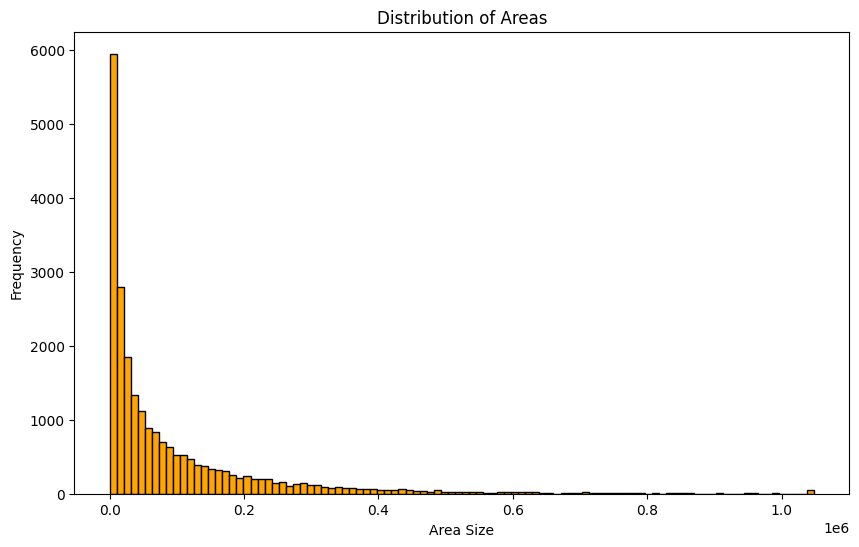

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(areas, bins=100, edgecolor='black', color='orange')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

In [22]:
import numpy as np
areas_np = np.array(areas)
filtered_areas = areas_np[areas_np < 100000]
filtered_areas

array([10402.56, 26259.36, 69096.17, ..., 57309.72,  1772.74, 53008.67])

### 10만단위 이상은 자르고 봐보기

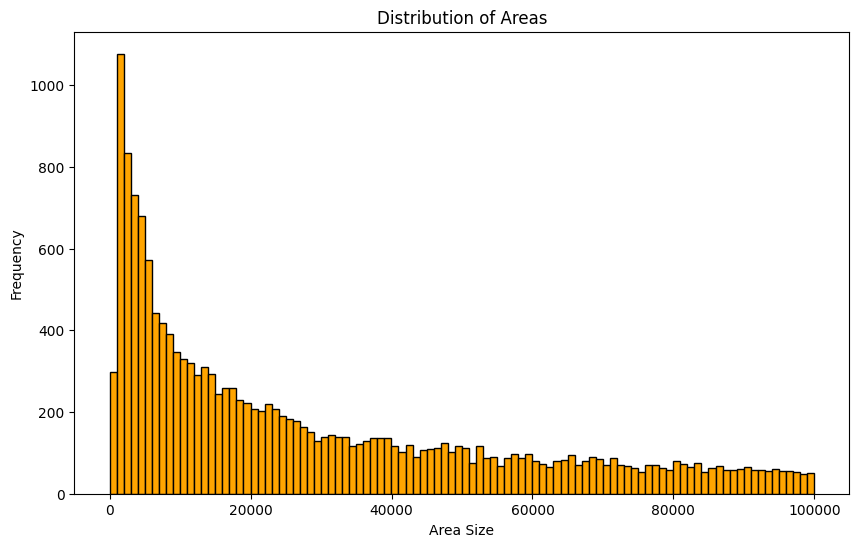

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(filtered_areas, bins=100, edgecolor='black', color='orange')  # bins로 막대기 수 조절
plt.title("Distribution of Areas")
plt.xlabel("Area Size")
plt.ylabel("Frequency")
plt.show()

### small bbox, medium bbox 개수 확인

In [25]:
filtered_areas_32 = filtered_areas[filtered_areas < 32*32]
filtered_areas_96 = filtered_areas[filtered_areas < 96*96]
print(len(filtered_areas_32))
print(len(filtered_areas_96))

313
5507


### 이미지 개수 확인

In [31]:
image_bbox_dict = [{'image_id': annotation['image_id'], 'bbox': annotation['bbox']} for annotation in df['annotations']]

In [32]:
image_bbox_dict

[{'image_id': 0, 'bbox': [197.6, 193.7, 547.8, 469.7]},
 {'image_id': 1, 'bbox': [0.0, 407.4, 57.6, 180.6]},
 {'image_id': 1, 'bbox': [0.0, 455.6, 144.6, 181.6]},
 {'image_id': 1, 'bbox': [722.3, 313.4, 274.3, 251.9]},
 {'image_id': 1, 'bbox': [353.2, 671.0, 233.7, 103.4]},
 {'image_id': 1, 'bbox': [3.7, 448.5, 778.2, 242.0]},
 {'image_id': 1, 'bbox': [425.3, 681.9, 216.4, 179.8]},
 {'image_id': 1, 'bbox': [92.4, 601.7, 139.2, 53.1]},
 {'image_id': 1, 'bbox': [622.4, 686.5, 72.8, 94.2]},
 {'image_id': 2, 'bbox': [267.9, 165.2, 631.6, 513.0]},
 {'image_id': 3, 'bbox': [462.2, 369.4, 233.9, 254.6]},
 {'image_id': 3, 'bbox': [773.3, 3.0, 188.4, 428.4]},
 {'image_id': 4, 'bbox': [567.5, 462.2, 165.2, 89.4]},
 {'image_id': 4, 'bbox': [859.4, 411.7, 164.2, 200.9]},
 {'image_id': 4, 'bbox': [362.0, 349.7, 130.0, 251.9]},
 {'image_id': 4, 'bbox': [392.5, 348.4, 212.0, 255.7]},
 {'image_id': 4, 'bbox': [482.2, 491.4, 277.7, 208.5]},
 {'image_id': 4, 'bbox': [868.2, 521.7, 101.2, 44.7]},
 {'imag

In [41]:
image_area_dict = {}
for image in image_bbox_dict:
    width = image['bbox'][2]
    height = image['bbox'][3]
    area = width * height
    image_area_dict[image['image_id']] = area

print(image_area_dict)

{0: 257301.65999999997, 1: 6857.76, 2: 324010.8, 3: 80710.56, 4: 4523.64, 5: 7761.0, 6: 222913.17, 7: 391485.88, 8: 559347.65, 9: 168024.78000000003, 10: 102452.04000000001, 11: 13126.08, 12: 94348.24, 13: 40667.06, 14: 5270.52, 15: 5897.64, 16: 348151.91, 17: 305691.87, 18: 2771.2, 19: 535229.24, 20: 117079.81999999999, 21: 8881.83, 22: 240330.24, 23: 342823.66, 24: 176296.5, 25: 143371.8, 26: 196047.90000000002, 27: 107428.64000000001, 28: 36600.08, 29: 80547.72, 30: 366753.8, 31: 23266.88, 32: 476226.96, 33: 111109.43999999999, 34: 357343.98, 35: 142263.69, 36: 8251.470000000001, 37: 223585.91999999995, 38: 1590.45, 39: 60703.450000000004, 40: 106768.83000000002, 41: 85566.51999999999, 42: 1226.1599999999999, 43: 133212.56, 44: 73197.95, 45: 1718.56, 46: 165238.15, 47: 86910.76, 48: 185563.66000000003, 49: 51419.76, 50: 240207.35, 51: 27258.000000000004, 52: 167008.14, 53: 20994.84, 54: 6345.0, 55: 96928.0, 56: 10603.18, 57: 311800.60000000003, 58: 343533.12000000005, 59: 139240.68,

In [42]:
image_area_dict

{0: 257301.65999999997,
 1: 6857.76,
 2: 324010.8,
 3: 80710.56,
 4: 4523.64,
 5: 7761.0,
 6: 222913.17,
 7: 391485.88,
 8: 559347.65,
 9: 168024.78000000003,
 10: 102452.04000000001,
 11: 13126.08,
 12: 94348.24,
 13: 40667.06,
 14: 5270.52,
 15: 5897.64,
 16: 348151.91,
 17: 305691.87,
 18: 2771.2,
 19: 535229.24,
 20: 117079.81999999999,
 21: 8881.83,
 22: 240330.24,
 23: 342823.66,
 24: 176296.5,
 25: 143371.8,
 26: 196047.90000000002,
 27: 107428.64000000001,
 28: 36600.08,
 29: 80547.72,
 30: 366753.8,
 31: 23266.88,
 32: 476226.96,
 33: 111109.43999999999,
 34: 357343.98,
 35: 142263.69,
 36: 8251.470000000001,
 37: 223585.91999999995,
 38: 1590.45,
 39: 60703.450000000004,
 40: 106768.83000000002,
 41: 85566.51999999999,
 42: 1226.1599999999999,
 43: 133212.56,
 44: 73197.95,
 45: 1718.56,
 46: 165238.15,
 47: 86910.76,
 48: 185563.66000000003,
 49: 51419.76,
 50: 240207.35,
 51: 27258.000000000004,
 52: 167008.14,
 53: 20994.84,
 54: 6345.0,
 55: 96928.0,
 56: 10603.18,
 57: 3

In [43]:
areas_values = np.array(list(image_area_dict.values()))

filtered_areas_32 = areas_values[areas_values < 32*32]
filtered_areas_96 = areas_values[areas_values < 96*96]

print(len(filtered_areas_32))  
print(len(filtered_areas_96))  

43
722
